# Dataset Description: Treatment Episode Data Set - Discharges (TEDS-D) 2022

## Introduction
The **Treatment Episode Data Set - Discharges (TEDS-D) 2022** contains **1,394,138 records** of individuals discharged from substance use treatment facilities in the United States. The dataset is managed by the **Substance Abuse and Mental Health Services Administration (SAMHSA)** and is used to monitor substance use treatment trends.

## Attributes and Data Types
The dataset consists of **76 attributes**, all of which are **integer-type (int64)**. These attributes represent various **demographic, treatment, behavioral, and criminal justice** factors related to **substance use disorder (SUD)** treatment.

### 1. Demographic Information
- **AGE**: Age at admission (categorical)
- **GENDER**: 1 = Male, 2 = Female
- **RACE**: Racial categories
- **ETHNIC**: Hispanic/Latino origin
- **MARSTAT**: Marital status
- **EDUC**: Education level at admission
- **EMPLOY**: Employment status at admission
- **VET**: Veteran status

### 2. Substance Use Information
- **SUB1, SUB2, SUB3**: Primary, secondary, and tertiary substances at admission
- **SUB1_D, SUB2_D, SUB3_D**: Primary, secondary, and tertiary substances at discharge
- **ROUTE1, ROUTE2, ROUTE3**: Route of administration (Oral, Smoking, Injection, etc.)
- **FREQ1, FREQ2, FREQ3**: Frequency of substance use at admission
- **FREQ1_D, FREQ2_D, FREQ3_D**: Frequency of substance use at discharge
- **FRSTUSE1, FRSTUSE2, FRSTUSE3**: Age at first use for each substance

### 3. Treatment and Outcome Variables
- **SERVICES**: Type of treatment received
- **SERVICES_D**: Type of service at discharge
- **LOS**: Length of stay in treatment (days)
- **DAYWAIT**: Days waited for treatment admission
- **METHUSE**: Use of medication-assisted opioid therapy (e.g., Methadone, Buprenorphine)
- **REASON**: Reason for discharge (Treatment completed, Dropped out, Terminated, etc.)

### 4. Criminal Justice and Referral Information
- **PSOURCE**: Source of referral to treatment (Self, Healthcare, Court, Employer, etc.)
- **DETCRIM**: Detailed criminal justice referral
- **ARRESTS**: Arrests in the past 30 days before admission
- **ARRESTS_D**: Arrests in the past 30 days before discharge

### 5. Additional Indicators
- **HLTHINS**: Health insurance status
- **PRIMPAY**: Primary payment source
- **LIVARAG**: Living arrangement at admission
- **LIVARAG_D**: Living arrangement at discharge
- **FREQ_ATND_SELF_HELP**: Frequency of self-help group attendance at admission
- **FREQ_ATND_SELF_HELP_D**: Frequency of self-help group attendance at discharge

## Missing Values
The dataset **does not contain any NULL values**, but missing or unknown data is coded as **-9**.  
The attributes most affected by missing values include:
- **CBSA2020**: Core-Based Statistical Area
- **PSOURCE**: Referral Source
- **ARRESTS**: Arrests in the last 30 days
- **DAYWAIT**: Days waited for admission
- **EMPLOY**: Employment status

## Potential Outliers
- **Extreme values in LOS (Length of Stay in Treatment)**: Some cases may have very long or short treatment durations.
- **Unusual entries in substance use variables (SUB1, SUB2, SUB3)**: Checking for inconsistent values in reported substances.
- **Binary flags (ALCFLG, COKEFLG, etc.)**: Expected values should be `0` or `1`. Any other values indicate possible data issues.

## Measurement Scales Across Attributes
### Nominal (Categorical Data)
- **GENDER, RACE, ETHNIC**
- **SERVICES, SERVICES_D**
- **PSOURCE, REASON, VET**
- **SUB1, SUB2, SUB3** (Categorical substance types)

### Ordinal (Ordered Categories)
- **AGE** (Grouped age categories)
- **EDUC** (Education level)
- **FREQ1, FREQ2** (Substance use frequency)
- **EMPLOY, EMPLOY_D** (Employment status)

### Interval (Continuous Data without True Zero)
- **FRSTUSE1, FRSTUSE2** (Age at first use of substances)
- **DAYWAIT** (Days waited for treatment admission)

### Ratio (Continuous Data with True Zero)
- **LOS** (Length of Stay in Treatment)
- **ARRESTS, ARRESTS_D** (Number of arrests in the past 30 days)
- **NOPRIOR** (Number of prior treatment episodes)

## Conclusion
This dataset provides a **comprehensive snapshot** of individuals discharged from **substance use treatment** facilities in 2022. It includes detailed **demographic, treatment, and behavioral indicators**, making it a valuable resource for **machine learning models** aimed at predicting treatment outcomes, identifying risk factors, and improving intervention strategies.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Load Data

In [ ]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load  dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tedsd_puf_2022.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Summary Statistics & Dataset Dimensionality


In [ ]:
import pandas as pd

# Summary statistics of the dataset
summary_stats = df.describe(include = 'all')
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
           DISYR        CASEID        STFIPS          EDUC       MARSTAT  \
count  1394138.0  1.394138e+06  1.394138e+06  1.394138e+06  1.394138e+06   
mean      2022.0  7.600834e+05  2.453327e+01  1.133183e+00 -9.171732e-01   
std          0.0  4.603728e+05  1.490206e+01  4.457348e+00  4.684747e+00   
min       2022.0  1.000000e+00  1.000000e+00 -9.000000e+00 -9.000000e+00   
25%       2022.0  3.548492e+05  8.000000e+00  2.000000e+00  1.000000e+00   
50%       2022.0  7.308455e+05  2.600000e+01  3.000000e+00  1.000000e+00   
75%       2022.0  1.188230e+06  3.600000e+01  3.000000e+00  1.000000e+00   
max       2022.0  1.540941e+06  7.200000e+01  5.000000e+00  4.000000e+00   

           SERVICES       DETCRIM           LOS       PSOURCE       NOPRIOR  \
count  1.394138e+06  1.394138e+06  1.394138e+06  1.394138e+06  1.394138e+06   
mean   5.573978e+00 -7.066980e+00  2.015164e+01  1.506919e+00 -6.168256e-02   
std    1.899308e+00  4.631593e+00  1.444286e+01  4.778638e

In [ ]:
# Dataframe metadata
df.shape[1]
df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394138 entries, 0 to 1394137
Data columns (total 76 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   DISYR                  1394138 non-null  int64
 1   CASEID                 1394138 non-null  int64
 2   STFIPS                 1394138 non-null  int64
 3   EDUC                   1394138 non-null  int64
 4   MARSTAT                1394138 non-null  int64
 5   SERVICES               1394138 non-null  int64
 6   DETCRIM                1394138 non-null  int64
 7   LOS                    1394138 non-null  int64
 8   PSOURCE                1394138 non-null  int64
 9   NOPRIOR                1394138 non-null  int64
 10  ARRESTS                1394138 non-null  int64
 11  EMPLOY                 1394138 non-null  int64
 12  METHUSE                1394138 non-null  int64
 13  PSYPROB                1394138 non-null  int64
 14  PREG                   1394138 non-null  int64
 15

In [ ]:
# Count of missing data
missing_values = (df == -9).sum()


# Filter out columns with no missing values for clarity
missing_values = missing_values[missing_values > 0]


# Display results
missing_percentage = (df == -9).sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)


EDUC                     15.709779
MARSTAT                  24.343788
DETCRIM                  84.750721
PSOURCE                  13.410150
NOPRIOR                   7.209760
ARRESTS                  17.249871
EMPLOY                   14.266809
METHUSE                  12.341318
PSYPROB                  14.147810
PREG                     66.544488
GENDER                    0.065632
VET                      15.401847
LIVARAG                  15.646514
DAYWAIT                  53.725743
EMPLOY_D                 17.904469
LIVARAG_D                24.560122
ARRESTS_D                19.298950
DSMCRIT                  20.202591
RACE                      4.999218
ETHNIC                    4.822478
DETNLF                   78.727572
DETNLF_D                 76.952999
PRIMINC                  34.784648
SUB1                     12.077284
SUB2                      3.296230
SUB3                     10.446885
SUB1_D                   12.055048
SUB2_D                    6.320393
SUB3_D              

In [ ]:

# X = df.drop(columns=['REASON']) # Exclude the target variable
# y = df['REASON'] # Define target


# # Train a Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)



# # Get feature importances and select top 20
# importances = pd.Series(rf.feature_importances_, index=X.columns)
# top_features = importances.nlargest(20).index



# df_reduced = df[top_features]
# print(f"Reduced dataset shape: {df_reduced.shape}")

# # Standardize the dataset
# scaler = StandardScaler()

# df_scaled = scaler.fit_transform(df_reduced)

## Age Distribution

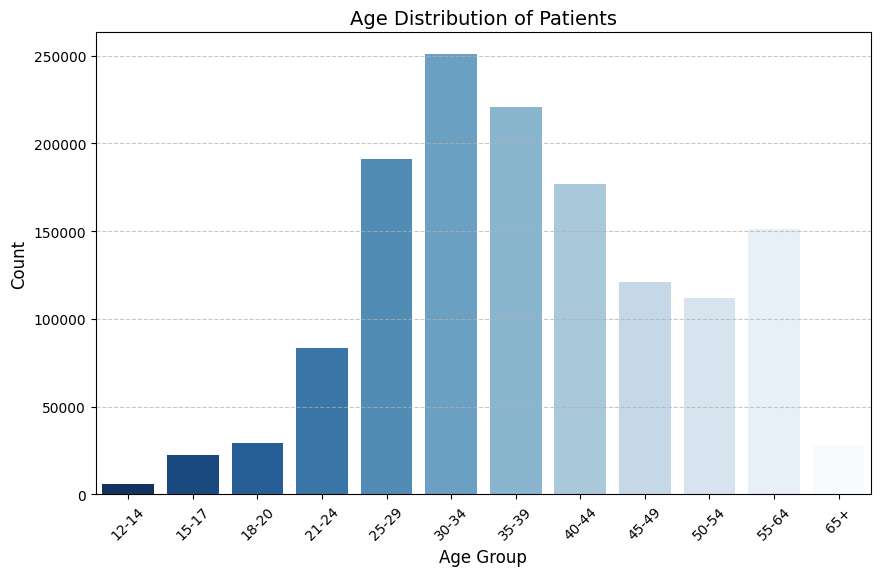

In [ ]:
age_labels = [
    "12-14", "15-17", "18-20", "21-24",
    "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-64",
    "65+"
]


plt.figure(figsize=(10, 6))
sns.barplot(x=df['AGE'].value_counts().sort_index().index,
            y=df['AGE'].value_counts().sort_index().values,
            hue=df['AGE'].value_counts().sort_index().index,
            palette="Blues_r",
            legend=False)

plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks = range(len(age_labels)), labels = age_labels, rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Gender Distribution

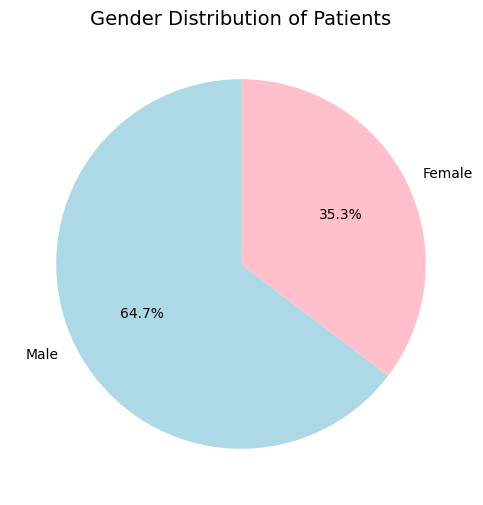

In [ ]:
# Ensure Gender is correctly labeled and filter out unexpected values
df = df.dropna(subset=['GENDER'])  # Remove any NaN values after mapping

# Map gender values to labels
df['GENDER'] = df['GENDER'].replace({
    1: 'Male',
    2: 'Female',
    -9: None
})

# Plot Gender Distribution
plt.figure(figsize=(6, 6))
df['GENDER'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 colors=['lightblue', 'pink'])

plt.title("Gender Distribution of Patients", fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.show()


## Primary Substance Used at Admission

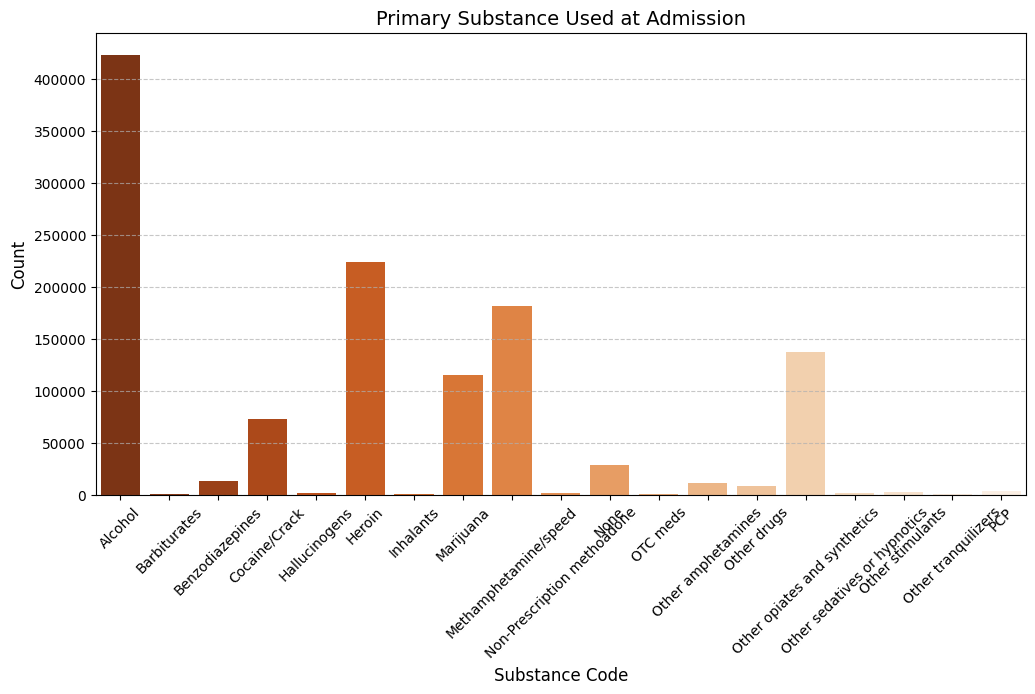

In [ ]:
# Map the source codes to the corresponding labels
df['SUB1'] = df['SUB1'].replace(
    {
        1: 'None',
        2: 'Alcohol',
        3: 'Cocaine/Crack',
        4: 'Marijuana',
        5: 'Heroin',
        6: 'Non-Prescription methoadone',
        7: 'Other opiates and synthetics',
        8: 'PCP',
        9: 'Hallucinogens',
        10: 'Methamphetamine/speed',
        11: 'Other amphetamines',
        12: 'Other stimulants',
        13: 'Benzodiazepines',
        14: 'Other tranquilizers',
        15: 'Barbiturates',
        16: 'Other sedatives or hypnotics',
        17: 'Inhalants',
        18: 'OTC meds',
        19: 'Other drugs',
        -9: None
    }
)

plt.figure(figsize=(12, 6))
sns.barplot(x=df['SUB1'].value_counts().sort_index().index,
            y=df['SUB1'].value_counts().sort_index().values,
            hue=df['SUB1'].value_counts().sort_index().index,
            palette="Oranges_r",
            legend=False)

plt.title("Primary Substance Used at Admission", fontsize=14)
plt.xlabel("Substance Code", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Reason for Discharge

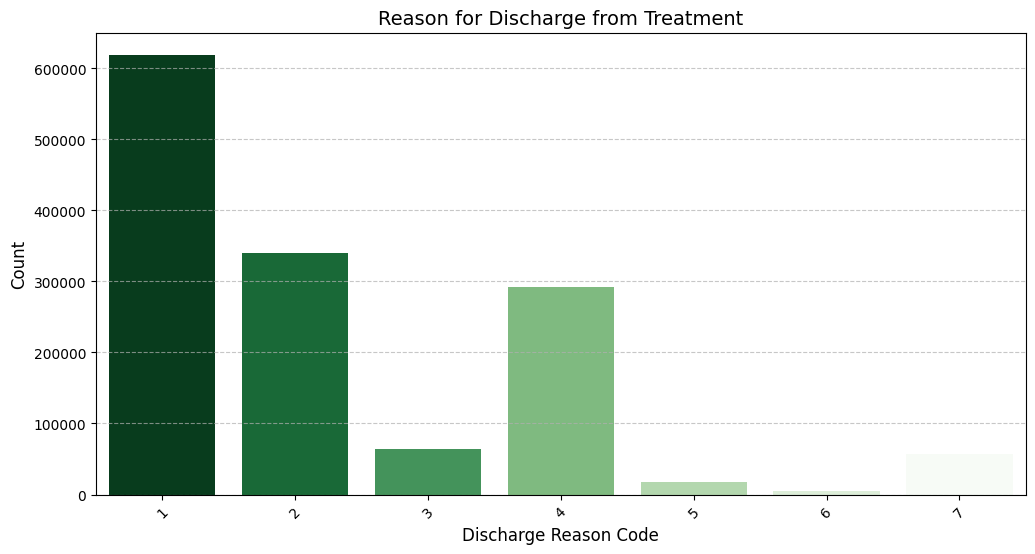

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['REASON'].value_counts().sort_index().index,
            y=df['REASON'].value_counts().sort_index().values,
            hue=df['REASON'].value_counts().sort_index().index,
            palette="Greens_r",
            legend=False)

plt.title("Reason for Discharge from Treatment", fontsize=14)
plt.xlabel("Discharge Reason Code", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Dataset preprocessing and cleaning


# **Correlation Analysis & Interpretation**
The correlation heatmap above provides insights into **how strongly different numerical variables in the dataset are related**. It helps in **identifying multicollinearity**, which can affect **predictive modeling and statistical analysis**.

---

# **Correlation Analysis & Interpretation**
The correlation heatmap above provides insights into **how strongly different numerical variables in the dataset are related**. It helps in **identifying multicollinearity**, which can affect **predictive modeling and statistical analysis**.

---

## **Key Observations from the Correlation Heatmap**
### **1. High Collinearity (Strong Positive Correlations)**
- **Substance Use Variables (`COKEFLG`, `HERFLG`, `METHFLG`, etc.)**  
  - Strong correlations exist between **various drug flags**, suggesting that individuals who use one substance are **more likely** to use others.
  - For example, `COKEFLG` (Cocaine use) is **positively correlated** with `HERFLG` (Heroin use) and `MTHAMFLG` (Methamphetamine use).  
  - **Possible Implication:** Many patients in the dataset may be **polysubstance users**, which needs to be considered in **treatment planning**.

- **Arrests Before and After Treatment (`ARRESTS`, `ARRESTS_D`)**  
  - A **strong positive correlation** exists between the number of **arrests before and after treatment**.  
  - **Possible Implication:** Patients with **prior legal issues** tend to continue having interactions with the justice system post-treatment.  
  - **Next Steps:** Investigate whether certain **treatment types** (e.g., inpatient vs. outpatient) are associated with a **reduction in criminal activity**.

- **Employment Status (`EMPLOY`, `EMPLOY_D`)**  
  - High correlation between **employment at admission** and **employment at discharge** suggests that **employment status remains stable** for most patients.
  - **Possible Implication:** Treatment may have **limited impact on employment**, or **external social factors** play a larger role in job stability.

---

### **2. Moderate Positive Correlations**
- **Primary, Secondary, and Tertiary Substance Use (`SUB1_D`, `SUB2_D`, `SUB3_D`)**  
  - The **post-treatment** drug usage variables (`SUB1_D`, `SUB2_D`, `SUB3_D`) show correlation, implying that if a patient uses multiple substances at admission, they are **likely to continue** using multiple substances at discharge.
  - **Next Steps:**  
    - Assess whether **specific treatment types** (e.g., medication-assisted therapy) impact **substance use reduction** at discharge.  
    - Determine if **certain substances** are more likely to be substituted with others post-treatment.

- **Self-Help Group Attendance (`FREQ_ATND_SELF_HELP`, `FREQ_ATND_SELF_HELP_D`)**  
  - A **moderate correlation** between attendance at self-help groups before and after treatment suggests that **patients who were engaged in self-help groups before treatment tend to continue** post-discharge.
  - **Possible Implication:** Treatment **reinforces pre-existing support systems** rather than initiating new ones.

---

### **3. Negative Correlations**
- **Age (`AGE`) vs. Drug Use Flags (`COKEFLG`, `HERFLG`, `METHFLG`, etc.)**  
  - **Older individuals** show **lower correlation** with substance use variables, suggesting that **drug use is more prevalent among younger patients**.
  - **Possible Implication:**  
    - Treatment programs may need **age-specific interventions**, particularly targeting **younger patients**.
    - Examine if **older individuals** are more likely to complete treatment successfully.

- **Primary Payment Source (`PRIMPAY`) vs. Employment (`EMPLOY`)**  
  - Patients with **stable employment** tend to have **different primary payment sources** than those who are unemployed.
  - **Possible Implication:** Insurance status and financial stability may **impact access to certain treatment programs**.

---

### **4. Minimal or No Correlation**
- **Region (`REGION`) and State (`STFIPS`)**  
  - These geographical variables show **minimal correlation** with treatment outcomes.
  - **Possible Explanation:**  
    - Treatment outcomes may be **more influenced by personal and behavioral factors** rather than **location-based differences**.
    - Certain **state-specific treatment policies** might not be significantly impacting overall trends.

---

In [ ]:
# Missing Data Report
df_copy = df.copy()
df_copy.replace(-9, pd.NA, inplace=True)
total_rows = len(df)
missing_data_summary = []

# Iterate through columns
for idx, col in enumerate(df_copy.columns):
    missing_count = df_copy[col].isnull().sum()
    if missing_count == 0:
        continue  # Skip columns with no missing values
    missing_percent = (missing_count / total_rows) * 100
    solution = 'Impute Value' if missing_percent <= 25 else 'Drop Column'

    # Append results to list
    missing_data_summary.append([idx, col, missing_percent, solution])

# Convert to DataFrame
missing_data_df = pd.DataFrame(missing_data_summary, columns=['Column Number', 'Column Name', 'Percentage Missing', 'Solution'])
print(missing_data_df)

    Column Number            Column Name  Percentage Missing      Solution
0               3                   EDUC           15.709779  Impute Value
1               4                MARSTAT           24.343788  Impute Value
2               6                DETCRIM           84.750721   Drop Column
3               8                PSOURCE           13.410150  Impute Value
4               9                NOPRIOR            7.209760  Impute Value
5              10                ARRESTS           17.249871  Impute Value
6              11                 EMPLOY           14.266809  Impute Value
7              12                METHUSE           12.341318  Impute Value
8              13                PSYPROB           14.147810  Impute Value
9              14                   PREG           66.544488   Drop Column
10             15                 GENDER            0.065632  Impute Value
11             16                    VET           15.401847  Impute Value
12             17        

<ipython-input-14-828562d75e9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=missing_values.index, x=missing_values.values, palette="magma")


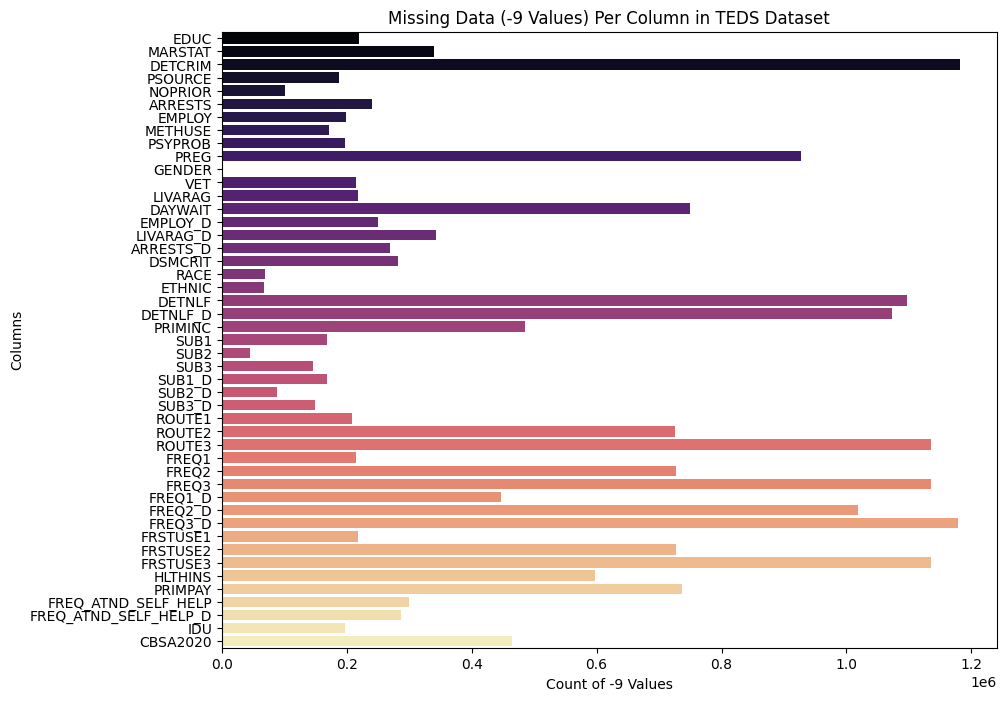

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y=missing_values.index, x=missing_values.values, palette="magma")



plt.ylabel("Columns")
plt.xlabel("Count of -9 Values")
plt.title("Missing Data (-9 Values) Per Column in TEDS Dataset")
plt.show()


### Identify outliers using the Interquartile Range (IQR) method



In [ ]:
# Replace -9 with NaN to remove missing values before detecting outliers
df_cleaned = df.replace(-9, pd.NA)

# Identify outliers using the Interquartile Range (IQR) method
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = {}

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col].count()

    if outliers > 0:
        outlier_counts[col] = outliers

# Convert the dictionary to a DataFrame for better readability
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=["Outlier Count"])

# Display the updated outlier report
print("Updated Outlier Count Report:")
print(outlier_df)

Updated Outlier Count Report:
          Outlier Count
AGE                5989
COKEFLG          235507
HERFLG           282166
METHFLG            4229
OPSYNFLG         203416
PCPFLG             6356
HALLFLG            7660
MTHAMFLG         307454
AMPHFLG           24082
STIMFLG            7017
BENZFLG           60994
TRNQFLG             402
BARBFLG            1438
SEDHPFLG           6141
INHFLG             1445
OTCFLG             1848
OTHERFLG          47805


### Collinearity Analysis:

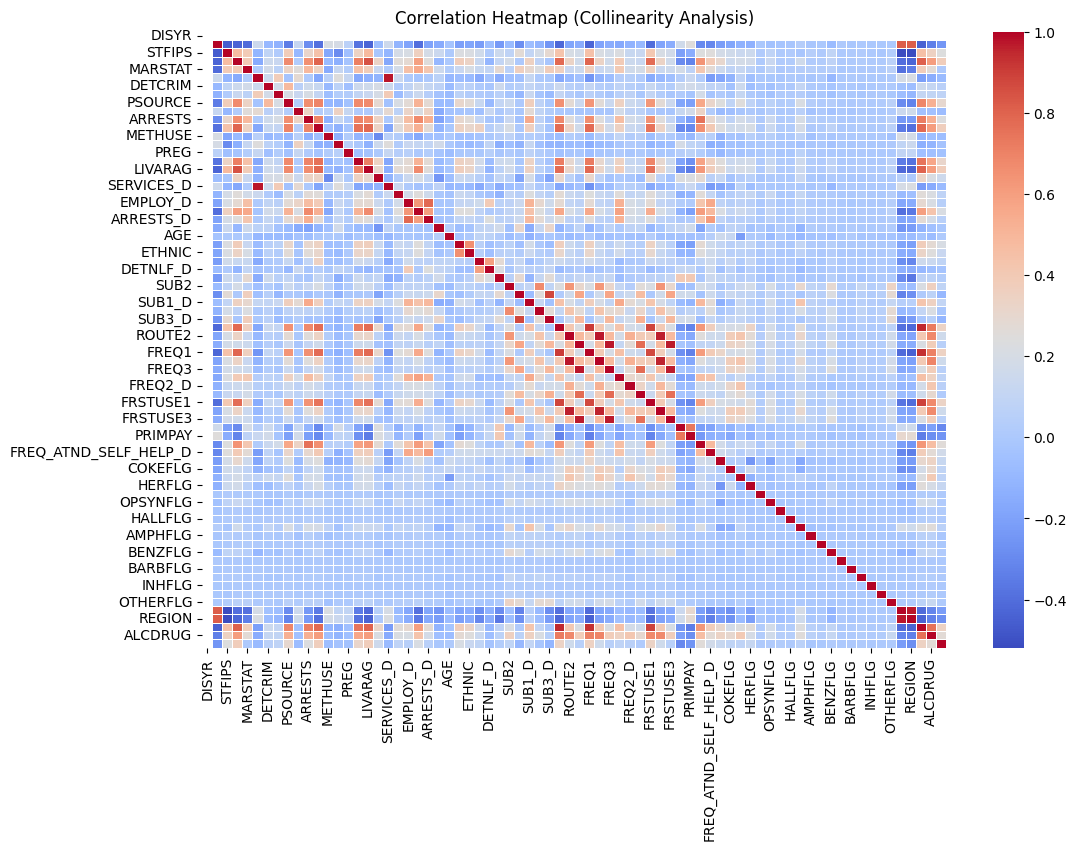

<Figure size 640x480 with 0 Axes>

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Correlation Heatmap (Collinearity Analysis)")
plt.show()
plt.savefig("")

# **Correlation Analysis & Interpretation**
The correlation heatmap above provides insights into **how strongly different numerical variables in the dataset are related**. It helps in **identifying multicollinearity**, which can affect **predictive modeling and statistical analysis**.

---

## **Key Observations from the Correlation Heatmap**
### **1. High Collinearity (Strong Positive Correlations)**
- **Substance Use Variables (`COKEFLG`, `HERFLG`, `METHFLG`, etc.)**  
  - Strong correlations exist between **various drug flags**, suggesting that individuals who use one substance are **more likely** to use others.
  - For example, `COKEFLG` (Cocaine use) is **positively correlated** with `HERFLG` (Heroin use) and `MTHAMFLG` (Methamphetamine use).  
  - **Possible Implication:** Many patients in the dataset may be **polysubstance users**, which needs to be considered in **treatment planning**.

- **Arrests Before and After Treatment (`ARRESTS`, `ARRESTS_D`)**  
  - A **strong positive correlation** exists between the number of **arrests before and after treatment**.  
  - **Possible Implication:** Patients with **prior legal issues** tend to continue having interactions with the justice system post-treatment.  
  - **Next Steps:** Investigate whether certain **treatment types** (e.g., inpatient vs. outpatient) are associated with a **reduction in criminal activity**.

- **Employment Status (`EMPLOY`, `EMPLOY_D`)**  
  - High correlation between **employment at admission** and **employment at discharge** suggests that **employment status remains stable** for most patients.
  - **Possible Implication:** Treatment may have **limited impact on employment**, or **external social factors** play a larger role in job stability.

---

### **2. Moderate Positive Correlations**
- **Primary, Secondary, and Tertiary Substance Use (`SUB1_D`, `SUB2_D`, `SUB3_D`)**  
  - The **post-treatment** drug usage variables (`SUB1_D`, `SUB2_D`, `SUB3_D`) show correlation, implying that if a patient uses multiple substances at admission, they are **likely to continue** using multiple substances at discharge.
  - **Next Steps:**  
    - Assess whether **specific treatment types** (e.g., medication-assisted therapy) impact **substance use reduction** at discharge.  
    - Determine if **certain substances** are more likely to be substituted with others post-treatment.

- **Self-Help Group Attendance (`FREQ_ATND_SELF_HELP`, `FREQ_ATND_SELF_HELP_D`)**  
  - A **moderate correlation** between attendance at self-help groups before and after treatment suggests that **patients who were engaged in self-help groups before treatment tend to continue** post-discharge.
  - **Possible Implication:** Treatment **reinforces pre-existing support systems** rather than initiating new ones.

---

### **3. Negative Correlations**
- **Age (`AGE`) vs. Drug Use Flags (`COKEFLG`, `HERFLG`, `METHFLG`, etc.)**  
  - **Older individuals** show **lower correlation** with substance use variables, suggesting that **drug use is more prevalent among younger patients**.
  - **Possible Implication:**  
    - Treatment programs may need **age-specific interventions**, particularly targeting **younger patients**.
    - Examine if **older individuals** are more likely to complete treatment successfully.

- **Primary Payment Source (`PRIMPAY`) vs. Employment (`EMPLOY`)**  
  - Patients with **stable employment** tend to have **different primary payment sources** than those who are unemployed.
  - **Possible Implication:** Insurance status and financial stability may **impact access to certain treatment programs**.

---

### **4. Minimal or No Correlation**
- **Region (`REGION`) and State (`STFIPS`)**  
  - These geographical variables show **minimal correlation** with treatment outcomes.
  - **Possible Explanation:**  
    - Treatment outcomes may be **more influenced by personal and behavioral factors** rather than **location-based differences**.
    - Certain **state-specific treatment policies** might not be significantly impacting overall trends.

---

## **Next Steps**
✅ **Check for Multicollinearity in Modeling**  
   - If highly correlated variables (e.g., `COKEFLG` & `HERFLG`) are included in **predictive models**, consider **removing one** to avoid redundancy.

✅ **Investigate Key Relationships Further**  
   - Are polysubstance users less likely to **complete treatment successfully**?  
   - Do **self-help groups** reduce **post-treatment relapse rates**?

✅ **Tailor Treatment Strategies Based on Findings**  
   - Age-based treatment plans for **younger individuals** with high drug use.  
   - Criminal justice interventions for **high-risk individuals** post-treatment.  

Would you like a **pairwise scatterplot** or **detailed numerical correlation table** to explore further relationships? 📊🚀


### Identifying Inconsistent Categorical Values

In [ ]:
categorical_cols = ['GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'EMPLOY', 'PSOURCE', 'SERVICES', 'REASON']
categorical_issues = {}

for col in categorical_cols:
    unique_values = df[col].unique()
    categorical_issues[col] = unique_values

# Display the unique values for each categorical variable
for col, values in categorical_issues.items():
    print(f"{col}: {values}")


GENDER: ['Female' 'Male' None]
RACE: [ 1 -9  5  8  2  4  7  6  9  3]
ETHNIC: [ 4 -9  3  2  5  1]
MARSTAT: [ 1 -9  2  3  4]
EMPLOY: [ 1  4  3  2 -9]
PSOURCE: [ 1  6  2  3 -9  7  5  4]
SERVICES: [7 6 5 4 2 3 1 8]
REASON: [3 7 5 1 2 4 6]


# **Analysis of Categorical Variables & Identified Issues**
The following categorical variables were analyzed for **unique values** to identify **missing values (`-9`) and inconsistencies**. The presence of `-9` indicates **missing or unknown data**, which requires handling during preprocessing.

---

## **1. Gender (`GENDER`)**
**Unique Values:** `['Female' 'Male' None]`  
- No **unexpected values** are present.
- **`None` values indicate missing gender data**, which should be handled appropriately.

**Next Steps:**
✅ Consider **filling missing gender values** if another variable (e.g., name, pronouns) helps infer gender.  
✅ Otherwise, **leave as missing (`NaN`)** or encode as `"Unknown"`.  

---

## **2. Race (`RACE`)**
**Unique Values:** `[1, -9, 5, 8, 2, 4, 7, 6, 9, 3]`  
- **`-9` represents missing race information**, affecting data integrity.
- **Nine unique racial categories are present**, requiring a proper mapping to their respective groups.

**Next Steps:**
✅ **Replace `-9` with `NaN`** for consistency.  
✅ **Map numeric codes** to actual race descriptions (if available in documentation).  

---

## **3. Ethnicity (`ETHNIC`)**
**Unique Values:** `[4, -9, 3, 2, 5, 1]`  
- **`-9` is present as missing values**.
- Five valid categories are included.

**Next Steps:**
✅ Replace `-9` with **NaN**.  
✅ **Confirm the meaning of each numeric code** and ensure proper labeling.  

---

## **4. Marital Status (`MARSTAT`)**
**Unique Values:** `[1, -9, 2, 3, 4]`  
- **Contains `-9` (missing values)**.
- Expected categories seem correct (e.g., Single, Married, Divorced, etc.).

**Next Steps:**
✅ **Replace `-9` with NaN**.  
✅ **Check for any missing documentation** about the specific meaning of each status.  

---

## **5. Employment Status (`EMPLOY`)**
**Unique Values:** `[1, 4, 3, 2, -9]`  
- **`-9` is present as missing values**.
- The rest appear to represent different employment statuses.

**Next Steps:**
✅ Replace `-9` with **NaN** to handle missing employment status.  
✅ Ensure **each numeric code corresponds to expected categories** (e.g., Unemployed, Full-time, Part-time).  

---

## **6. Source of Referral (`PSOURCE`)**
**Unique Values:** `[1, 6, 2, 3, -9, 7, 5, 4]`  
- **`-9` is present (missing values)**.
- Other values likely correspond to different **referral sources** (e.g., Self-referral, Court, Healthcare provider).

**Next Steps:**
✅ **Replace `-9` with NaN**.  
✅ **Map numeric codes to actual referral source descriptions**.  

---

## **7. Treatment Services Received (`SERVICES`)**
**Unique Values:** `[7, 6, 5, 4, 2, 3, 1, 8]`  
- **No missing values (`-9`) detected.**
- These likely represent different treatment service types.

**Next Steps:**
✅ **Verify the meaning of each numeric code** and map them to readable labels.  
✅ No immediate missing value concerns here.  

---

## **8. Reason for Discharge (`REASON`)**
**Unique Values:** `[3, 7, 5, 1, 2, 4, 6]`  
- **No missing values (`-9`) detected.**
- These codes likely correspond to **different discharge reasons** (e.g., Completed treatment, Dropped out, Transferred, etc.).

**Next Steps:**
✅ **Verify and map numeric discharge reasons to meaningful labels**.  
✅ If certain categories are too broad, consider **grouping similar categories together**.

---

# **Final Recommendations**
1. **Handle Missing Values (`-9`)**
   - Replace all `-9` values with **NaN** for consistency.
   - Investigate if missing values can be **imputed** based on other patient characteristics.

2. **Map Numeric Codes to Meaningful Labels**
   - **RACE, ETHNIC, MARSTAT, PSOURCE, SERVICES, REASON** should be mapped to human-readable labels.

3. **Check for Data Entry Errors**
   - Ensure that each categorical variable **contains only expected values**.
   - If any unexpected category appears, further investigation is needed.

Would you like assistance in **automatically mapping these numeric codes to descriptive labels** in Python? 🚀


###  Reduce Data Complexity

In [ ]:
# def biplot(pca, df_scaled, labels=None):
#     fig, ax = plt.subplots(figsize=(10, 7))

#     # Scatter plot of data points
#     ax.scatter(df_scaled[:, 0], df_scaled[:, 1], alpha=0.5, label="Data points")

#     # Plot arrows (loadings) for the top contributing features
#     feature_vectors = pca.components_.T
#     arrow_scale = 20  # Adjust scaling for better visibility

#     for i, feature in enumerate(labels):
#         ax.arrow(0, 0, feature_vectors[i, 0] * arrow_scale, feature_vectors[i, 1] * arrow_scale,
#                  color='red', alpha=0.7, head_width=0.1, head_length=0.1)
#         ax.text(feature_vectors[i, 0] * arrow_scale * 1.1, feature_vectors[i, 1] * arrow_scale * 1.1,
#                 feature, color='red', fontsize=12)

#     # Labels and Title
#     ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
#     ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
#     ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
#     ax.axvline(0, color='black', linestyle='--', linewidth=0.5)
#     ax.set_title("PCA Biplot")
#     plt.grid()
#     plt.show()

# # Call the biplot function
# biplot(pca, principal_components, labels=df.columns)

In [ ]:
# pca = PCA(n_components = 6)
# principal_components = pca.fit_transform(df_scaled)


# # Convert PCA resutls into Dataframe
# df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(6)])

# print(df_pca.head())

# # Plot explained variance
# plt.figure(figsize=(8,5))
# plt.plot(range(1, 7), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
# plt.xlabel("Number of Principal Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("Explained Variance by Principal Components")
# plt.show()

# # Display feature contribution to each principal component
# pca_components = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(6)])
# print(pca_components)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tedsd_puf_2022.csv')
# Data Cleaning
df_clean = df.copy()
# Dictionary to contain changes, will be used to create final cleaning output
cleaning_list = []

# 1. Reduce Rows by narrowing down to a geographic region:
prev_shape = df_clean.shape  # (rows, columns)
df_clean = df_clean[df_clean['REGION'] == 1].copy()
new_shape = df_clean.shape  # (rows, columns)

# Log the cleaning step
cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Filtered dataset to include only REGION 1 (Northeast region)",
    'Cleaning Undertaken': "Kept rows where 'REGION' == 1, dropped all others",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': "REGION = 2, 3, etc.",
    'After Example': "REGION = 1 only"
})

prev_shape = new_shape

# 2. Drop any columns that have a standard deviation of 0 (ie irrelevant columns like DISYR, Region now, etc.)

zero_std_cols = df_clean.std(numeric_only=True) == 0
cols_to_drop = zero_std_cols[zero_std_cols].index.tolist()
df_clean.drop(columns=cols_to_drop, inplace=True)
new_shape = df_clean.shape

cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Dropped columns with standard deviation of 0 (ie irrelevant columns like DISYR, Region now, etc.)",
    'Cleaning Undertaken': f"Removed {len(cols_to_drop)} columns where all values were the same",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': f"{cols_to_drop[:3]}..." if len(cols_to_drop) > 3 else cols_to_drop,  # Show a few columns
    'After Example': "Columns not present"
})
prev_shape = new_shape

# 3. Missing Value Conversion - convert all -9 values to NaN
missing_values_before = (df_clean == -9).sum().sum()
df_clean.replace(-9, np.nan, inplace=True)
missing_values_after = (df_clean == -9).sum().sum()
cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Converted all '-9' values to NaN",
    'Cleaning Undertaken': f"Replaced all {missing_values_before} records with '-9' values to NaN to mark them as missing",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': "-9",
    'After Example': "NaN"
})


# 4. Drop any Columns that contain more than 25% Missing Values
missing_threshold = 0.25 * len(df_clean)
cols_to_drop = df_clean.columns[df_clean.isna().sum() > missing_threshold].tolist()
df_clean.drop(columns=cols_to_drop, inplace=True)
new_shape = df_clean.shape
cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Dropped columns with more than 25% missing values",
    'Cleaning Undertaken': f"Removed {len(cols_to_drop)} columns exceeding 25% missing values threshold",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': f"{cols_to_drop[:3]}..." if len(cols_to_drop) > 3 else cols_to_drop,  # Show a few column names
    'After Example': "Columns not present"
})
prev_shape = new_shape

# 5. Impute median value for other missing values in the dataset
num_cols_with_na = df_clean.select_dtypes(include=[np.number]).columns[df_clean.isna().sum() > 0].tolist()
missing_values_before = df_clean[num_cols_with_na].isna().sum().sum()
df_clean[num_cols_with_na] = df_clean[num_cols_with_na].apply(lambda col: col.fillna(col.median()))
missing_values_after = df_clean[num_cols_with_na].isna().sum().sum()
cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Imputed median value for other missing data",
    'Cleaning Undertaken': f"Replaced {missing_values_before} NaN values with column medians for numerical data",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': "EDUC = NaN",
    'After Example': "EDUC = 3"
})

# 6. Drop all of the flag columns - these are attributed in the SUB1, 2, etc. already
flag_cols_to_drop = [col for col in df_clean.columns if 'FLG' in col]
flag_cols_to_drop.append("IDU")
df_clean.drop(columns=flag_cols_to_drop, inplace=True)
new_shape = df_clean.shape

cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Dropped all 'FLG' flag columns since they are already accounted for in SUB1,2,3 etc. columns",
    'Cleaning Undertaken': f"Removed {len(flag_cols_to_drop)} columns that were redundant",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': f"{flag_cols_to_drop[:3]}..." if len(flag_cols_to_drop) > 3 else flag_cols_to_drop,
    'After Example': "Columns not present"
})
prev_shape = new_shape

# 7. Check for variables with high correlation and consider dropping them:
corr_threshold = 0.80
correlation_matrix = df_clean.corr(numeric_only=True).abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]
df_clean.drop(columns=high_corr_cols, inplace=True)
new_shape = df_clean.shape

cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Dropped highly correlated columns",
    'Cleaning Undertaken': f"Removed {len(high_corr_cols)} column(s) with correlation > {corr_threshold}",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': f"{high_corr_cols[:3]}..." if len(high_corr_cols) > 3 else high_corr_cols,
    'After Example': "Columns not present"
})
prev_shape = new_shape

# 8. Convert categorical columns from numeric to human-readable values:
gender_mapping = {
    1: "Male",
    2: "Female",
}
race_mapping = {
    1: "Alaska Native (Aleut, Eskimo)",
    2: "American Indian (other than Alaska Native)",
    3: "Asian or Pacific Islander",
    4: "Black or African American",
    5: "White",
    6: "Asian",
    7: "Other single race",
    8: "Two or more races",
    9: "Native Hawaiian or Other Pacific Islander",
}
ethnic_mapping = {
    1: "Puerto Rican",
    2: "Mexican",
    3: "Cuban or other specific Hispanic",
    4: "Not of Hispanic or Latino origin",
    5: "Hispanic, specific origin not specified",
}
marstat_mapping = {
    1: "Never Married",
    2: "Now Married",
    3: "Separated",
    4: "Divorced/Widowed",
}
educ_mapping = {
    1: "Less than one school grade (No Schooling - Grade 8)",
    2: "Grades 9 to 11",
    3: "Grade 12 or GED",
    4: "1-3 years of college/university/vocational school",
    5: "4+ years of college, BA/BS, postgraduate study",
}
employ_mapping = {
    1: "Full-time",
    2: "Part-time",
    3: "Unemployed",
    4: "Not in labor force",
}
livarag_mapping = {
    1: "Homeless",
    2: "Dependent living",
    3: "Independent living",
}
priminc_mapping = {
    1: "Wages/Salary",
    2: "Public Assistance",
    3: "Retirement/Pension",
    4: "Disability",
    5: "Other",
    6: "None",
}
substance_mapping = {
    1: "None",
    2: "Alcohol",
    3: "Cocaine/Crack",
    4: "Marijuana/Hashish",
    5: "Heroin",
    6: "Non-prescription Methadone",
    7: "Other Opiates/Synthetics",
    8: "PCP",
    9: "Hallucinogens",
    10: "Methamphetamine/Speed",
    11: "Other Amphetamines",
    12: "Other Stimulants",
    13: "Benzodiazepines",
    14: "Other Tranquilizers",
    15: "Barbiturates",
    16: "Other Sedatives/Hypnotics",
    17: "Inhalants",
    18: "Over-the-counter Drugs",
    19: "Other Drugs",
}
route_mapping = {
    1: "Oral",
    2: "Smoking",
    3: "Inhalation",
    4: "Injection",
    5: "Other",
}
frequency_mapping = {
    1: "No use in past month",
    2: "1-3 times in past month",
    3: "1-2 times per week",
    4: "3-6 times per week",
    5: "Daily",
}
reason_mapping = {
    1: "Treatment Completed",
    2: "Dropped Out",
    3: "Terminated by Facility",
    4: "Transferred to Another Facility",
    5: "Incarcerated",
    6: "Death",
}
state_mapping = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    72: "Puerto Rico",
}
services_mapping = {
    1: "Detox, 24-hour, hospital inpatient",
    2: "Detox, 24-hour, free-standing residential",
    3: "Rehab/residential, hospital (non-detox)",
    4: "Rehab/residential, short term (≤30 days)",
    5: "Rehab/residential, long term (>30 days)",
    6: "Ambulatory, intensive outpatient",
    7: "Ambulatory, non-intensive outpatient",
    8: "Ambulatory, detoxification",
}

psource_mapping = {
    1: "Individual (self, family, friend, etc.)",
    2: "Alcohol/drug use care provider",
    3: "Other health care provider",
    4: "School (educational)",
    5: "Employer/Employee Assistance Program (EAP)",
    6: "Other community referral",
    7: "Court/criminal justice referral/DUI/DWI",
}

methuse_mapping = {
    1: 1,
    2: 0
}
psych_prob_mapping = {
    1: 1,
    2: 0
}
vet_status_mapping = {
    1: 1,
    2: 0
}
arrest_mapping = {
    0: "None",
    1: "Once",
    2: "Two or more times"
}
dsmcrit_mapping = {
    1: "Alcohol-induced disorder",
    2: "Substance-induced disorder",
    3: "Alcohol intoxication",
    4: "Alcohol dependence",
    5: "Opioid dependence",
    6: "Cocaine dependence",
    7: "Cannabis dependence",
    8: "Other substance dependence",
    9: "Alcohol abuse",
    10: "Cannabis abuse",
    11: "Other substance abuse",
    12: "Opioid abuse",
    13: "Cocaine abuse",
    14: "Anxiety disorders",
    15: "Depressive disorders",
    16: "Schizophrenia/other psychotic disorders",
    17: "Bipolar disorders",
    18: "Attention deficit/disruptive behavior disorders",
    19: "Other mental health condition",
}

age_mapping = {
    1: "12-14 years old",
    2: "15-17 years old",
    3: "18-20 years old",
    4: "21-24 years old",
    5: "25-29 years old",
    6: "30-34 years old",
    7: "35-39 years old",
    8: "40-44 years old",
    9: "45-49 years old",
    10: "50-54 years old",
    11: "55-64 years old",
    12: "65 years and older",
}
first_use_mapping = {
    1: "11 years and under",
    2: "12-14 years",
    3: "15-17 years",
    4: "18-20 years",
    5: "21-24 years",
    6: "25-29 years",
    7: "30 years and older",
}
self_help_freq_mapping = {
    1: "No attendance",
    2: "1-3 times in the past month",
    3: "4-7 times in the past month",
    4: "8-30 times in the past month",
    5: "Some attendance, frequency unknown",
}

division_mapping = {
    0: "U.S. Territories (e.g., Puerto Rico)",
    1: "New England (CT, ME, MA, NH, RI, VT)",
    2: "Middle Atlantic (NJ, NY, PA)",
    3: "East North Central (IL, IN, MI, OH, WI)",
    4: "West North Central (IA, KS, MN, MO, NE, ND, SD)",
    5: "South Atlantic (DE, DC, FL, GA, MD, NC, SC, VA, WV)",
    6: "East South Central (AL, KY, MS, TN)",
    7: "West South Central (AR, LA, OK, TX)",
    8: "Mountain (AZ, CO, ID, MT, NV, NM, UT, WY)",
    9: "Pacific (AK, CA, HI, OR, WA)",
}
alcdrug_mapping = {
    0: "None",
    1: "Alcohol only",
    2: "Other drugs only",
    3: "Alcohol and other drugs",
}

column_mappings = {
    "STFIPS": state_mapping,
    "EDUC": educ_mapping,
    "MARSTAT": marstat_mapping,
    "SERVICES": services_mapping,
    "PSOURCE": psource_mapping,
    "ARRESTS": arrest_mapping,
    "EMPLOY": employ_mapping,
    "METHUSE": methuse_mapping,
    "PSYPROB": psych_prob_mapping,
    "GENDER": gender_mapping,
    "VET": vet_status_mapping,
    "LIVARAG": livarag_mapping,
    "REASON": reason_mapping,
    "EMPLOY_D": employ_mapping,
    "LIVARAG_D": livarag_mapping,
    "ARRESTS_D": arrest_mapping,
    "DSMCRIT": dsmcrit_mapping,
    "AGE": age_mapping,
    "RACE": race_mapping,
    "ETHNIC": ethnic_mapping,
    "PRIMINC": priminc_mapping,
    "SUB1": substance_mapping,
    "SUB2": substance_mapping,
    "SUB3": substance_mapping,
    "SUB1_D": substance_mapping,
    "SUB2_D": substance_mapping,
    "SUB3_D": substance_mapping,
    "ROUTE1": route_mapping,
    "FREQ1": frequency_mapping,
    "FRSTUSE1": first_use_mapping,
    "FREQ_ATND_SELF_HELP": self_help_freq_mapping,
    "FREQ_ATND_SELF_HELP_D": self_help_freq_mapping,
    "DIVISION": division_mapping,
    "ALCDRUG": alcdrug_mapping,
}
# Apply mappings to corresponding columns
for column, mapping in column_mappings.items():
    df_clean[column] = df_clean[column].map(mapping)

cleaning_list.append({
    'Issue No.': len(cleaning_list) + 1,
    'Description': "Converted all data from values in codebook to human readable values",
    'Cleaning Undertaken': "Mapped from codebook numeric values to their actual meaning",
    'Size Before': f"Rows: {prev_shape[0]}, Columns: {prev_shape[1]}",
    'Size After': f"Rows: {new_shape[0]}, Columns: {new_shape[1]}",
    'Before Example': "Gender = 1,2",
    'After Example': "Gender = Male, Female"
})

data_cleaning_summary_df = pd.DataFrame(cleaning_list)
print(data_cleaning_summary_df)
df_clean["REASON"] = df_clean["REASON"].apply(
    lambda x: "Yes" if x == "Treatment Completed" else "No"
)

   Issue No.                                        Description  \
0          1  Filtered dataset to include only REGION 1 (Nor...   
1          2  Dropped columns with standard deviation of 0 (...   
2          3                   Converted all '-9' values to NaN   
3          4  Dropped columns with more than 25% missing values   
4          5        Imputed median value for other missing data   
5          6  Dropped all 'FLG' flag columns since they are ...   
6          7                  Dropped highly correlated columns   
7          8  Converted all data from values in codebook to ...   

                                 Cleaning Undertaken  \
0  Kept rows where 'REGION' == 1, dropped all others   
1   Removed 1 columns where all values were the same   
2  Replaced all 4708462 records with '-9' values ...   
3  Removed 16 columns exceeding 25% missing value...   
4  Replaced 846256 NaN values with column medians...   
5             Removed 19 columns that were redundant   
6   